'\nt = df[\'Time (s)\']\nax = df[\'Acceleration x (m/s^2)\']\nsp1 = UnivariateSpline(t,ax)\nprint(sp1.get_coeffs)\n\nay = df[\'Acceleration y (m/s^2)\']\nsp1 = UnivariateSpline(t,ay)\nprint("y轴加速度的积分值：",sp1.integral(0,3.17))\n\naz = df[\'Acceleration z (m/s^2)\']\naz = az-9.8\nsp1 = UnivariateSpline(t,az)\nprint("z轴加速度的积分值：",sp1.integral(0,3.17))\n'

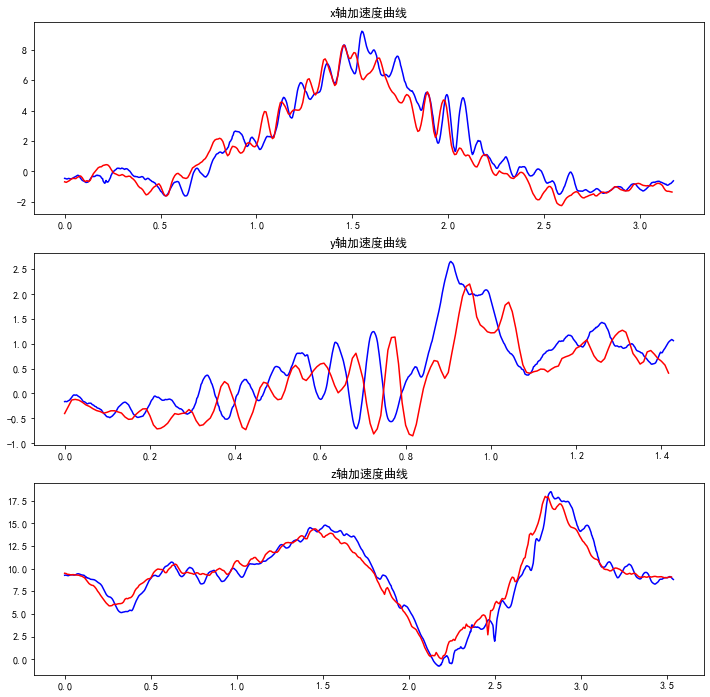

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from scipy.interpolate import interp1d, UnivariateSpline

plt.rcParams['font.family']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.sans-serif'] = ['SimHei']#正常显示标签
plt.figure(figsize=(12,12))

path1 = r"D:\HongliCup\题目B\低成本传感器数据\Low-cost sensor A 01.csv"
df = pd.read_csv(path1)
t = df['Time (s)']
ax = df['Acceleration x (m/s^2)']
plt.subplot(311)
plt.title('x轴加速度曲线')
plt.plot(t, ax, color='blue')
path2 = r"D:\HongliCup\题目B\高成本传感器数据\High quality sensor 01.csv"
df = pd.read_csv(path2)
t = df['Time (s)']
ax = df['Acceleration x (m/s^2)']
plt.plot(t, ax, color='red')

path1 = r"D:\HongliCup\题目B\低成本传感器数据\Low-cost sensor A 02.csv"
df = pd.read_csv(path1)
t = df['Time (s)']
ay = df['Acceleration y (m/s^2)']
plt.subplot(312)
plt.title('y轴加速度曲线')
plt.plot(t, ay, color='blue')
path2 = r"D:\HongliCup\题目B\高成本传感器数据\High quality sensor 02.csv"
df = pd.read_csv(path2)
t = df['Time (s)']
ax = df['Acceleration y (m/s^2)']
plt.plot(t, ax, color='red')

path1 = r"D:\HongliCup\题目B\低成本传感器数据\Low-cost sensor A 05.csv"
df = pd.read_csv(path1)
t = df['Time (s)']
az = df['Acceleration z (m/s^2)']
plt.subplot(313)
plt.title('z轴加速度曲线')
plt.plot(t, az, color='blue')
path2 = r"D:\HongliCup\题目B\高成本传感器数据\High quality sensor 05.csv"
df = pd.read_csv(path2)
t = df['Time (s)']
ax = df['Acceleration z (m/s^2)']
plt.plot(t, ax, color='red')

'''
path2 = r"D:\HongliCup\题目B\高成本传感器数据\High quality sensor 02.csv"
df = pd.read_csv(path2)
t = df['Time (s)']
ax = df['Acceleration x (m/s^2)']

plt.plot(t, ax, color='blue')
t = df['Time (s)']
ay = df['Acceleration y (m/s^2)']

plt.title('y轴加速度曲线')
plt.plot(t, ay, color='blue')
t = df['Time (s)']
az = df['Acceleration z (m/s^2)']

plt.title('z轴加速度曲线')
plt.plot(t, az, color='blue')
'''

'''
t = df['Time (s)']
ax = df['Acceleration x (m/s^2)']
sp1 = UnivariateSpline(t,ax)
print(sp1.get_coeffs)

ay = df['Acceleration y (m/s^2)']
sp1 = UnivariateSpline(t,ay)
print("y轴加速度的积分值：",sp1.integral(0,3.17))

az = df['Acceleration z (m/s^2)']
az = az-9.8
sp1 = UnivariateSpline(t,az)
print("z轴加速度的积分值：",sp1.integral(0,3.17))
'''

In [103]:
import numpy as np
import pandas as pd
import pylab as plt
# from scipy.fftpack import fft

plt.rcParams['font.family']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.sans-serif'] = ['SimHei']#正常显示标签

path1 = r"D:\HongliCup\题目B\高成本传感器数据\High quality sensor 08.csv"
df = pd.read_csv(path1)
t = df['Time (s)']
ax = df['Acceleration x (m/s^2)']
num = len(t)


fft=np.fft.fft(ax, len(t))

fftshift=np.fft.fftshift(fft)

amp=abs(fftshift)/len(fft)
pha=np.angle(fftshift)
fre=np.fft.fftshift(np.fft.fftfreq(d=1,n=len(t)))
'''
plt.figure()
plt.plot(fre,amp)
plt.xlabel('Frequency');plt.ylabel('Amplitude')
plt.title('高成本传感器x轴加速度数据DFT后的频域图像')
plt.show()
'''
'''
def freq_features(data):
    # 计算频域特征参数，输入的data是FFT后的数据，为 样本数*样本长度 的二维数组
    f_sum = np.sum(data, axis=-1)  # 总能量
    f_max = np.max(data, axis=-1)
    f_min = np.min(data, axis=-1)  # 最小值
    f_std = np.std(data, axis=-1)  # 标准差
    f_var = np.var(data, axis=-1)  # 方差
    f_pk = f_max - f_min  # 极差
    f_avg = np.mean(np.abs(data), axis=-1)  # 整流平均值
    # f_sk = np.mean(((data-np.mean(data, axis=-1)[:, :, np.newaxis]) ** 3), axis=-1)  # 偏度
    f_rms = np.linalg.norm(data, 2, axis=-1) / np.sqrt(data.shape[-1])  # 均方根
    return np.transpose(np.array([f_sum, f_min, f_std, f_var, f_pk, f_avg, f_rms]))
print(freq_features(abs_y))

path1 = r"D:\HongliCup\题目B\低成本传感器数据\low-cost sensor A 01.csv"
df = pd.read_csv(path1)
t = df['Time (s)']
ax = df['Acceleration x (m/s^2)']
num = 2000
fft=np.fft.fft(ax)
fftshift=np.fft.fftshift(fft)
amp=abs(fftshift)/len(fft)
pha=np.angle(fftshift)
fre=np.fft.fftshift(np.fft.fftfreq(d=1,n=len(t)))

plt.figure()
plt.plot(fre,amp)
plt.xlabel('Frequency');plt.ylabel('Amplitude')
plt.title('高成本传感器x轴加速度数据DFT后的频域图像')
plt.show()
'''
def freq_features(data):
    #计算频域特征参数，输入的data是FFT后的数据，为 样本数*样本长度 的二维数组
    f_sum = np.sum(data, axis=-1)  # 总能量
    f_max = np.max(data, axis=-1)
    f_min = np.min(data, axis=-1)  # 最小值
    f_std = np.std(data, axis=-1)  # 标准差
    f_var = np.var(data, axis=-1)  # 方差
    f_pk = f_max - f_min  # 极差
    f_avg = np.mean(np.abs(data), axis=-1)  # 整流平均值
    mean = data - np.mean(data,axis = -1)
    print(mean)
    f_sk = np.mean(((mean[:, :,np.newaxis]) ** 3), axis=-1)  # 偏度
    f_rms = np.linalg.norm(data, 2, axis=-1) / np.sqrt(data.shape[-1])  # 均方根
    return np.transpose(np.array([f_sum, f_max,f_min, f_std, f_var, f_pk, f_avg, f_rms,f_sk]))

'''
t = df['Time (s)']
ax = df['Acceleration y (m/s^2)']
num = 2000
fft=np.fft.fft(ax,num)
fftshift=np.fft.fftshift(fft)
amp=abs(fftshift)/len(fft)
pha=np.angle(fftshift)
fre=np.fft.fftshift(np.fft.fftfreq(d=1,n=num))
plt.figure()
plt.plot(fre,amp)
plt.xlabel('Frequency');plt.ylabel('Amplitude')
plt.title('高成本传感器y轴加速度数据DFT后的频域图像')

t = df['Time (s)']
ax = df['Acceleration z (m/s^2)']
num = 2000
fft=np.fft.fft(ax,num)
fftshift=np.fft.fftshift(fft)
amp=abs(fftshift)/len(fft)
pha=np.angle(fftshift)
fre=np.fft.fftshift(np.fft.fftfreq(d=1,n=num))
plt.figure()
plt.plot(fre,amp)
plt.xlabel('Frequency');plt.ylabel('Amplitude')
plt.title('高成本传感器z轴加速度数据DFT后的频域图像')
'''
path1 = r"D:\HongliCup\题目B\低成本传感器数据\Low-cost sensor B 01.xls"
df1 = pd.read_excel(path1)
path2 = r"D:\HongliCup\题目B\低成本传感器数据\Low-cost sensor B 02.xls"
df2 = pd.read_excel(path2)
path3 = r"D:\HongliCup\题目B\低成本传感器数据\Low-cost sensor B 03.xls"
df3 = pd.read_excel(path3)
path4 = r"D:\HongliCup\题目B\低成本传感器数据\Low-cost sensor B 04.xls"
df4 = pd.read_excel(path4)
path5 = r"D:\HongliCup\题目B\低成本传感器数据\Low-cost sensor B 05.xls"
df5 = pd.read_excel(path5)
path6 = r"D:\HongliCup\题目B\低成本传感器数据\Low-cost sensor B 06.xls"
df6 = pd.read_excel(path6)
path7 = r"D:\HongliCup\题目B\低成本传感器数据\Low-cost sensor B 07.xls"
df7 = pd.read_excel(path7)
path8 = r"D:\HongliCup\题目B\低成本传感器数据\Low-cost sensor B 08.xls"
df8 = pd.read_excel(path8)
path9 = r"D:\HongliCup\题目B\低成本传感器数据\Low-cost sensor B 09.xls"
df9 = pd.read_excel(path9)
path10 = r"D:\HongliCup\题目B\低成本传感器数据\Low-cost sensor B 10.xls"
df10 = pd.read_excel(path10)
path11 = r"D:\HongliCup\题目B\低成本传感器数据\low-cost sensor A 01.csv"
df11 = pd.read_csv(path11)
path12 = r"D:\HongliCup\题目B\低成本传感器数据\low-cost sensor A 02.csv"
df12 = pd.read_csv(path12)
path13 = r"D:\HongliCup\题目B\低成本传感器数据\low-cost sensor A 03.csv"
df13 = pd.read_csv(path13)
path14 = r"D:\HongliCup\题目B\低成本传感器数据\low-cost sensor A 04.csv"
df14 = pd.read_csv(path14)
path15 = r"D:\HongliCup\题目B\低成本传感器数据\low-cost sensor A 05.csv"
df15 = pd.read_csv(path15)
df = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15]

listlow = []
for i in range(0,15):
    dfs = df[i]
    x=dfs['Acceleration x (m/s^2)']
    x = np.array(x)
    t = dfs['Time (s)']
    t = np.array(t)
    num = len(t)
    fft=np.fft.fft(x, len(t))
    t1 = 0
    t2 = num
    listlow.append(freq_features(x))

path1 = r"D:\HongliCup\题目B\高成本传感器数据\High quality sensor 01.csv"
df1 = pd.read_csv(path1)
path2 = r"D:\HongliCup\题目B\高成本传感器数据\High quality sensor 02.csv"
df2 = pd.read_csv(path2)
path3 = r"D:\HongliCup\题目B\高成本传感器数据\High quality sensor 03.csv"
df3 = pd.read_csv(path3)
path4 = r"D:\HongliCup\题目B\高成本传感器数据\High quality sensor 04.csv"
df4 = pd.read_csv(path4)
path5 = r"D:\HongliCup\题目B\高成本传感器数据\High quality sensor 05.csv"
df5 = pd.read_csv(path5)
path6 = r"D:\HongliCup\题目B\高成本传感器数据\High quality sensor 06.csv"
df6 = pd.read_csv(path6)
path7 = r"D:\HongliCup\题目B\高成本传感器数据\High quality sensor 07.csv"
df7 = pd.read_csv(path7)
path8 = r"D:\HongliCup\题目B\高成本传感器数据\High quality sensor 08.csv"
df8 = pd.read_csv(path8)
path9 = r"D:\HongliCup\题目B\高成本传感器数据\High quality sensor 09.csv"
df9 = pd.read_csv(path9)
path10 = r"D:\HongliCup\题目B\高成本传感器数据\High quality sensor 10.csv"
df10 = pd.read_csv(path10)
path11 = r"D:\HongliCup\题目B\高成本传感器数据\High quality sensor 11.csv"
df11 = pd.read_csv(path11)
path12 = r"D:\HongliCup\题目B\高成本传感器数据\High quality sensor 12.csv"
df12 = pd.read_csv(path12)


df = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12]

pstf_list=[]

listhigh = []
for i in range(0,12):
    dfs = df[i]
    x=dfs['Acceleration x (m/s^2)']
    x = np.array(x)
    t = dfs['Time (s)']
    t = np.array(t)
    num = len(t)
    fft=np.fft.fft(x, len(t))
    t1 = 0
    t2 = num
    listhigh.append(freq_features(x))

x1 = range(1,6)
x2 = range(1,6)

fengzhilow = []
fengzhihigh = []
for i in range(0,5):
    fengzhilow.append(listlow[i][7])
for i in range(0,5):
    fengzhihigh.append(listhigh[i][7])

print(fengzhihigh)
plt.figure(figsize=(12,8))
plt.rc('font',size = 16)
plt.plot(x1,fengzhilow,color = 'blue',marker = '*' ,linewidth = 2,label = '低成本A')
plt.plot(x2,fengzhihigh,color = 'red',marker = 'x' ,linewidth = 2,label = '高成本前五')
plt.legend(loc = 'upper left')
plt.show()

[-4.12080613 -3.73041716 -3.54285541 -3.52704409 -3.64112297 -3.79071274
 -3.85137227 -3.9070901  -3.92246082 -3.94718817 -3.9255158  -3.89519563
 -3.84677532 -3.73094383 -3.46848193 -3.14940193 -2.94975421 -2.9004049
 -2.97166595 -3.05774227 -3.1353623  -3.20850041 -3.23184863 -3.25456479
 -3.31085733 -3.32000306 -3.264496   -3.11569157 -2.93431637 -2.82593569
 -2.86370662 -2.9629319  -3.06472376 -3.12292197 -3.14122334 -3.14916244
 -3.16162184 -3.2250587  -3.29534283 -3.36271563 -3.40974739 -3.33556548
 -3.21776119 -3.13171354 -3.0756605  -3.09004489 -3.12048951 -3.18301645
 -3.23498025 -3.24985304 -3.22864035 -3.17388979 -3.15534905 -3.11041465
 -3.11461893 -3.1595054  -3.14450815 -3.10726395 -3.04765788 -2.98941174
 -2.97904006 -2.987008   -2.94637361 -2.89006194 -2.80906132 -2.71775606
 -2.65993133 -2.66923037 -2.70952961 -2.7867761  -2.90769288 -3.00238839
 -3.04338661 -3.08452859 -3.07483688 -3.07837072 -3.14016023 -3.26256147
 -3.43254974 -3.59537461 -3.67753401 -3.73517683 -3.

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

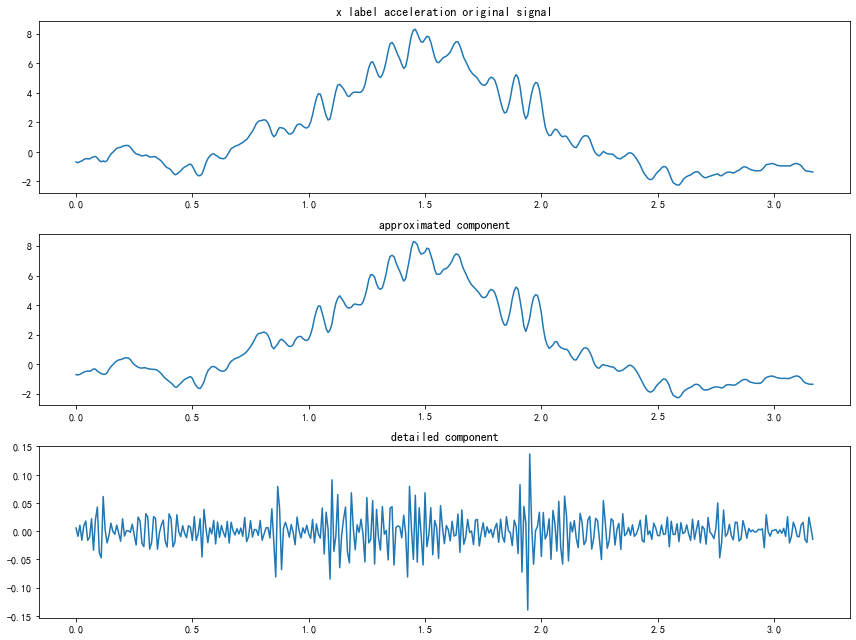

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import pandas as pd

plt.rcParams['font.family']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.sans-serif'] = ['SimHei']#正常显示标签

path1 = r"D:\HongliCup\题目B\高成本传感器数据\High quality sensor 01.csv"
df = pd.read_csv(path1)
x = df['Time (s)']
y = df['Acceleration x (m/s^2)']

ca, cd = pywt.dwt(y, 'db4')
ya = pywt.idwt(ca, None, 'db4') # approximated component
ya = ya[0:381]
yd = pywt.idwt(None, cd, 'db4') # detailed component
yd = yd[0:381]
plt.figure(figsize=(12,9))
plt.subplot(311)
plt.plot(x, y)
plt.title('x label acceleration original signal')
plt.subplot(312)
plt.plot(x, ya)
plt.title('approximated component')
plt.subplot(313)
plt.plot(x, yd)
plt.title('detailed component')
plt.tight_layout()
plt.show()

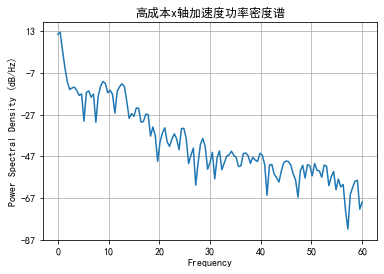

In [56]:
import numpy as np
import pandas as pd
import pylab as plt

plt.rcParams['font.family']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.sans-serif'] = ['SimHei']#正常显示标签

path1 = r"D:\HongliCup\题目B\高成本传感器数据\High quality sensor 01.csv"
df = pd.read_csv(path1)
t = df['Time (s)']
ax = df['Acceleration x (m/s^2)']
num = 2000
fft=np.fft.fft(ax)

plt.psd(ax, Fs=1/(t[1]-t[0]))
plt.title('高成本x轴加速度功率密度谱')
plt.show()

4
maximum level is 4


C:\Users\86180\AppData\Local\Temp\ipykernel_17756\1817899964.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ya4 = pywt.waverec(np.multiply(coeffs, [1, 0, 0, 0, 0]).tolist(), 'db16')
C:\Users\86180\AppData\Local\Temp\ipykernel_17756\1817899964.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  yd4 = pywt.waverec(np.multiply(coeffs, [0, 1, 0, 0, 0]).tolist(), 'db16')
C:\Users\86180\AppData\Local\Temp\ipykernel_17756\1817899964.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-o

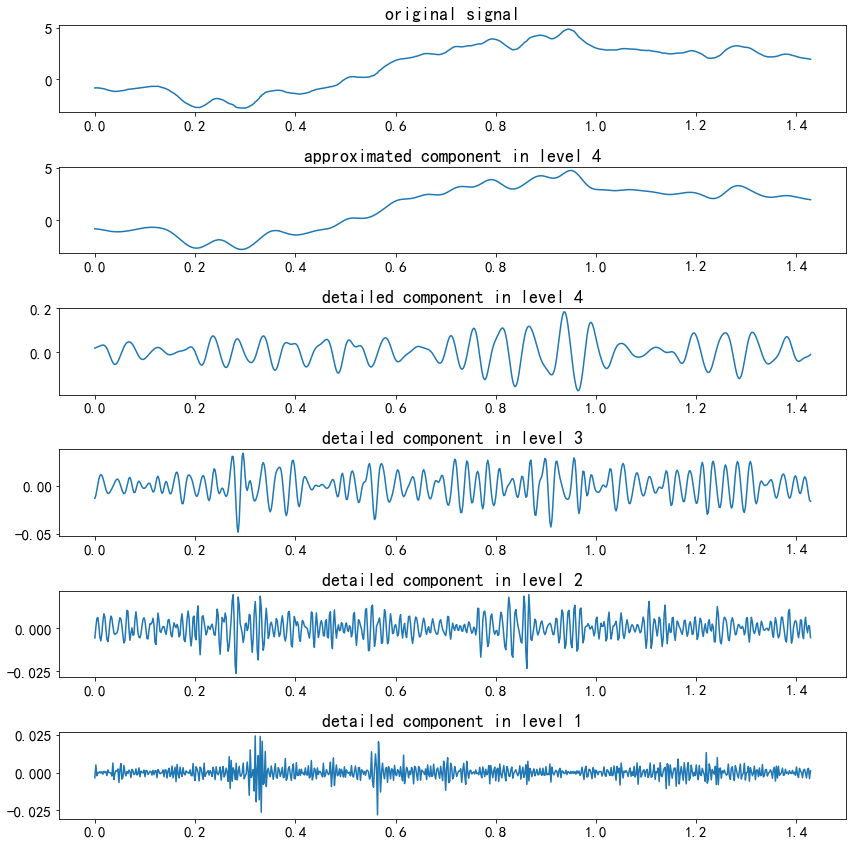

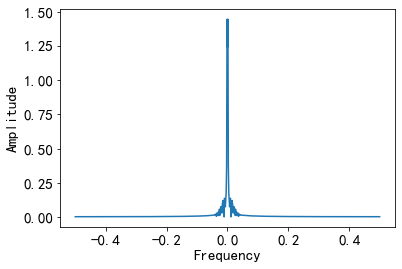

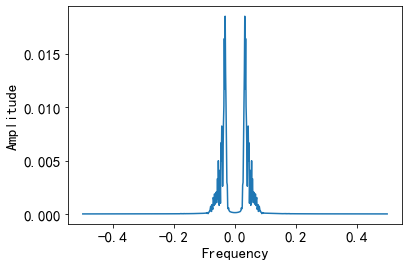

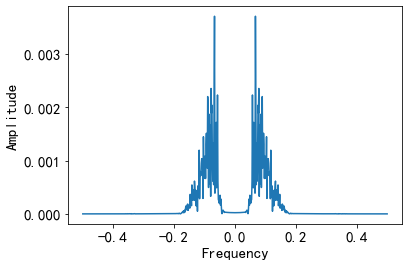

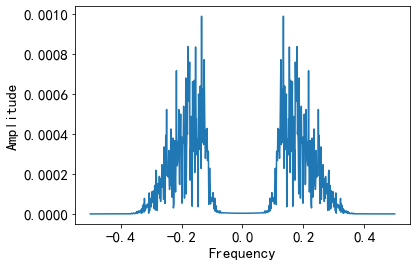

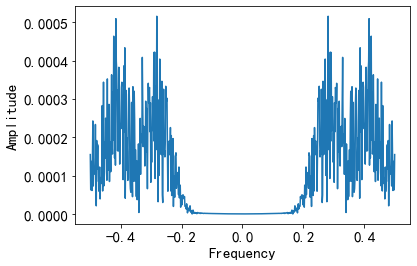

In [121]:
import matplotlib.pyplot as plt
import pywt
import pandas as pd
import numpy as np

plt.rcParams['font.family']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.sans-serif'] = ['SimHei']#正常显示标签
plt.rc('font',size = 16)
path1 = r"D:\HongliCup\题目B\低成本传感器数据\Low-cost sensor A 02.csv"
df = pd.read_csv(path1)
index = df['Time (s)']
data = df['Acceleration x (m/s^2)']

# Create wavelet object and define parameters
w = pywt.Wavelet('db16')  # 选用Daubechies8小波
maxlev = pywt.dwt_max_level(len(data), w.dec_len)
print(maxlev)
print("maximum level is " + str(maxlev))
threshold = 0.08  # Threshold for filtering

# Decompose into wavelet components, to the level selected:
coeffs = pywt.wavedec(data, 'db16', level=4)  # 将信号进行小波分解
# print(coeffs)
ya4 = pywt.waverec(np.multiply(coeffs, [1, 0, 0, 0, 0]).tolist(), 'db16')
yd4 = pywt.waverec(np.multiply(coeffs, [0, 1, 0, 0, 0]).tolist(), 'db16')
yd3 = pywt.waverec(np.multiply(coeffs, [0, 0, 1, 0, 0]).tolist(), 'db16')
yd2 = pywt.waverec(np.multiply(coeffs, [0, 0, 0, 1, 0]).tolist(), 'db16')
yd1 = pywt.waverec(np.multiply(coeffs, [0, 0, 0, 0, 1]).tolist(), 'db16')
n = len(df['Time (s)'])
ya4 = ya4[0:n]
yd4 = yd4[0:n]
yd3 = yd3[0:n]
yd2 = yd2[0:n]
yd1 = yd1[0:n]
x = df['Time (s)']
y = df['Acceleration x (m/s^2)']
plt.figure(figsize=(12, 12))
plt.rc('font',size = 15)
plt.subplot(611)
plt.plot(x, y)
plt.title('original signal')
plt.subplot(612)
plt.plot(x, ya4)
plt.title('approximated component in level 4')
plt.subplot(613)
plt.plot(x, yd4)
plt.title('detailed component in level 4')
plt.subplot(614)
plt.plot(x, yd3)
plt.title('detailed component in level 3')
plt.subplot(615)
plt.plot(x, yd2)
plt.title('detailed component in level 2')
plt.subplot(616)
plt.plot(x, yd1)
plt.title('detailed component in level 1')
plt.tight_layout()
plt.show()

num = len(data)

fft=np.fft.fft(ya4,num)
fftshift=np.fft.fftshift(fft)
amp=abs(fftshift)/len(fft)
fre=np.fft.fftshift(np.fft.fftfreq(d=1,n=num))
plt.figure()
plt.plot(fre,amp)
plt.xlabel('Frequency');plt.ylabel('Amplitude')
# plt.title('高成本传感器低频近似的频域图像')

fft=np.fft.fft(yd4,num)
fftshift=np.fft.fftshift(fft)
amp=abs(fftshift)/len(fft)
fre=np.fft.fftshift(np.fft.fftfreq(d=1,n=num))
plt.figure()
plt.plot(fre,amp)
plt.xlabel('Frequency');plt.ylabel('Amplitude')
# plt.title('高成本传感器高频细节1的频域图像')

fft=np.fft.fft(yd3,num)
fftshift=np.fft.fftshift(fft)
amp=abs(fftshift)/len(fft)
fre=np.fft.fftshift(np.fft.fftfreq(d=1,n=num))
plt.figure()
plt.plot(fre,amp)
plt.xlabel('Frequency');plt.ylabel('Amplitude')
# plt.title('高成本传感器高频细节2的频域图像')

fft=np.fft.fft(yd2,num)
fftshift=np.fft.fftshift(fft)
amp=abs(fftshift)/len(fft)
fre=np.fft.fftshift(np.fft.fftfreq(d=1,n=num))
plt.figure()
plt.plot(fre,amp)
plt.xlabel('Frequency');plt.ylabel('Amplitude')
# plt.title('高成本传感器高频细节3的频域图像')

fft=np.fft.fft(yd1,num)
fftshift=np.fft.fftshift(fft)
amp=abs(fftshift)/len(fft)
fre=np.fft.fftshift(np.fft.fftfreq(d=1,n=num))
plt.figure()
plt.plot(fre,amp)
plt.xlabel('Frequency');plt.ylabel('Amplitude')
# plt.title('高成本传感器高频细节4的频域图像')

plt.show()


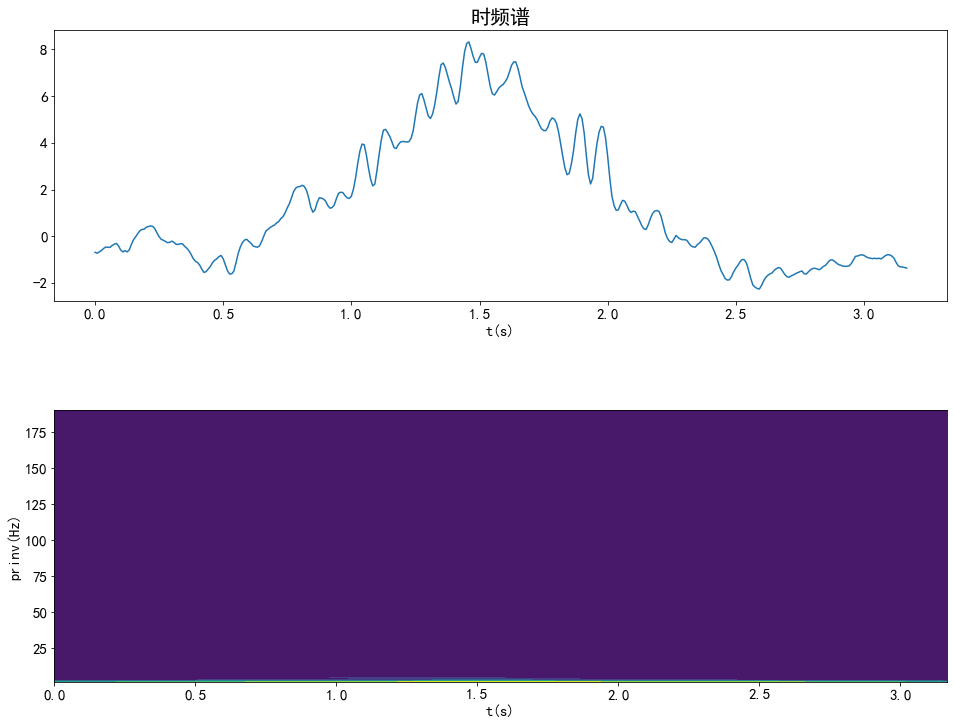

[5.21923022e+02 1.43217803e+02 1.16775329e+02 9.87970592e+01
 7.39628449e+01 6.21360212e+01 4.74968471e+01 3.59274306e+01
 2.81266159e+01 1.85847146e+01 1.37521463e+01 1.03844291e+01
 8.28094390e+00 6.06650023e+00 4.34329707e+00 3.10553960e+00
 2.38093464e+00 1.79354174e+00 1.23947231e+00 1.11066077e+00
 9.06134808e-01 6.70746162e-01 5.24989188e-01 4.66278190e-01
 3.80496589e-01 3.38276591e-01 3.00918238e-01 2.59473649e-01
 2.31581035e-01 2.17585692e-01 1.74878919e-01 1.54257203e-01
 1.35852669e-01 1.18870215e-01 1.08416728e-01 9.09808329e-02
 7.97450142e-02 7.51274750e-02 6.70101745e-02 5.81265957e-02
 5.12962279e-02 4.98508211e-02 4.15483061e-02 3.86770991e-02
 3.58017052e-02 3.01592853e-02 2.76610661e-02 2.51479941e-02
 2.27557712e-02 1.85891325e-02 1.57866684e-02 1.21560865e-02
 1.11434495e-02 1.01994641e-02 9.18413220e-03 7.18254016e-03
 6.12254397e-03 5.78658991e-03 4.14430555e-03 3.96967411e-03
 2.82130012e-03 2.52654940e-03 1.88401328e-03 1.76284558e-03
 1.56869271e-03 1.298212

In [74]:
# 小波
import pylab as plt
import pandas as pd
from scipy import signal
import pywt
import numpy as np
plt.rcParams['font.family']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.sans-serif'] = ['SimHei']#正常显示标签

path = r"D:\HongliCup\题目B\高成本传感器数据\High quality sensor 01.csv"
df = pd.read_csv(path)
t = df['Time (s)']
data = df['Acceleration x (m/s^2)']
sampling_rate = len(data)

wavename = 'cgau8'
totalscal = 256
fc = pywt.central_frequency(wavename)
cparam = 2 * fc * totalscal
scales = cparam / np.arange(totalscal, 1, -1)
[cwtmatr, frequencies] = pywt.cwt(data, scales, wavename, 1.0 / sampling_rate)
# print(cwtmatr)
plt.figure(figsize=(16, 12))
plt.subplot(211)
plt.plot(t, data)
plt.xlabel("t(s)")
plt.title('时频谱',  fontsize=20)
plt.subplot(212)
plt.contourf(t, frequencies, abs(cwtmatr))
plt.ylabel(u"prinv(Hz)")
plt.xlabel(u"t(s)")
plt.subplots_adjust(hspace=0.4)
plt.show()

u, sigma, vt = np.linalg.svd(cwtmatr)
print(sigma)
cs = np.cumsum(sigma**2)  
rate = cs / cs[-1]  #计算信息累积贡献率

ind = np.where(rate>=0.9)[0][0]+1
print(ind)

#ind为奇异值的个数，满足信息提出率达到90%
b = np.diag(sigma[:ind]) @ u.T[:ind, :] @ cwtmatr  #得到降维数据

c = np.linalg.norm(b, axis=0, keepdims=True)  #逐列求范数
d = 0.5 * b.T @ b / (c.T @ c) + 0.5  #求相似度
#d = 0.5 * np.corrcoef(b.T) + 0.5
dd = pd.DataFrame(d)
print(dd)

maximum level is 4
0.0929337655326946
[1.3911744058212931, 3.170125616181184, 0.8082960304573401, -0.6230007537341438, 1.3798918576473553, 2.573241078402705, 3.5507944118515926, 4.48428132289552]
[1.3983930199189487, 3.175806482681095, 0.8069149122573595, -0.6219467137202241, 1.3810626618908093, 2.6205852478852254, 3.6191924381561558, 4.575648269496322]


<Figure size 432x288 with 0 Axes>

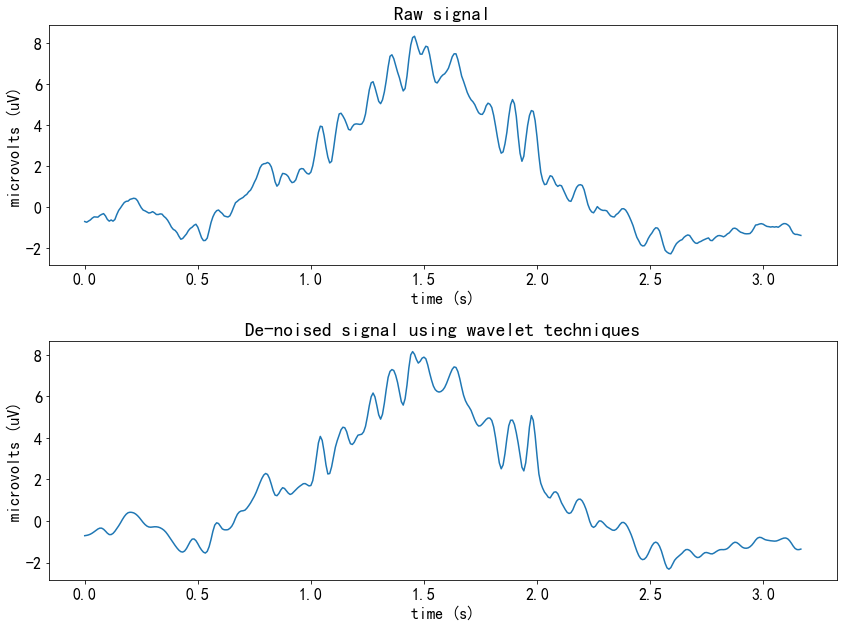

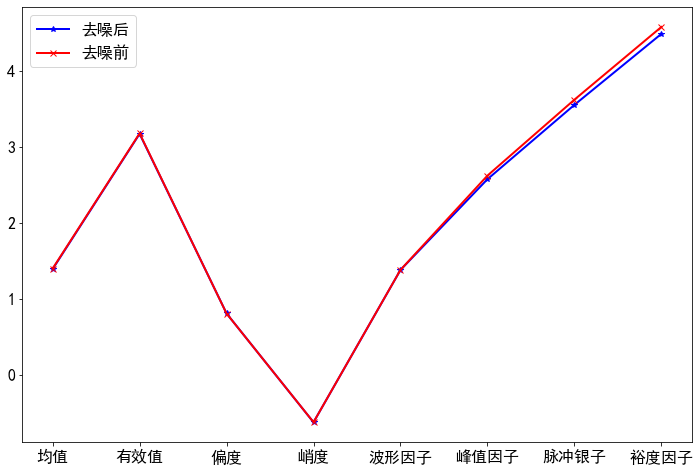

'\ny = data\ny_hat = datarec\nnum3 = len(y)\ny_hat = y_hat[0:num3]\nRMSE = np.linalg.norm(y-y_hat, ord=2)/len(y)**0.5\nprint(RMSE)\n'

In [131]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pywt
import pandas as pd

plt.rcParams['font.family']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.sans-serif'] = ['SimHei']#正常显示标签

pstf_list=[]
def  psfeatureTime(data,p1,p2):
    #均值
    df_mean=data[p1:p2].mean()
    #方差
    df_var=data[p1:p2].var()
    #标准差
    df_std=data[p1:p2].std()
    #均方根
    df_rms=math.sqrt(pow(df_mean,2) + pow(df_std,2))
    #偏度
    df_skew=data[p1:p2].skew()
    #峭度
    df_kurt=data[p1:p2].kurt()
    sum=0
    for i in range(p1,p2):
        sum+=math.sqrt(abs(data[i]))
    #波形因子
    df_boxing=df_rms / (abs(data[p1:p2]).mean())
    #峰值因子
    df_fengzhi=(max(data[p1:p2])) / df_rms
    #脉冲因子
    df_maichong=(max(data[p1:p2])) / (abs(data[p1:p2]).mean())
    #裕度因子
    df_yudu=(max(data[p1:p2])) / pow((sum/(p2-p1)),2)
    featuretime_list = [df_mean,df_rms,df_skew,df_kurt,df_boxing,df_fengzhi,df_maichong,df_yudu]
    return featuretime_list 

path1 = r"D:\HongliCup\题目B\低成本传感器数据\Low-cost sensor A 01.csv"
df = pd.read_csv(path1)

index = df['Time (s)']
data = df['Acceleration x (m/s^2)']

# Create wavelet object and define parameters
w = pywt.Wavelet('db8')  # 选用Daubechies8小波
maxlev = pywt.dwt_max_level(len(data), w.dec_len)
print("maximum level is " + str(maxlev))


# Decompose into wavelet components, to the level selected:
coeffs = pywt.wavedec(data, 'db8', level=4)  # 将信号进行小波分解

for i in range(1, len(coeffs)):#coeffs为小波分解后的列表
    tmp = coeffs[i].copy()
    Sum = 0.0
    for j in coeffs[i]:
        Sum = Sum + abs(j)
    N = len(coeffs[i])
    Sum = (1.0 / float(N)) * Sum
    sigma = (1/0.6745)*Sum   
lamda = sigma * math.sqrt(2.0 * math.log(float(N), math.e))#lamda为求出的阈值

print(lamda)
threshold = 5  # Threshold for filtering

plt.figure()
for i in range(3, len(coeffs)):
    coeffs[i] = pywt.threshold(coeffs[i], threshold*max(coeffs[i]))  # 将噪声滤波


'''
list_coeffs = []
for i in range(1, len(coeffs)):
    list_coeffs_ = list(coeffs[i])
    list_coeffs.append(list_coeffs_)

for r1 in range(len(list_coeffs)):
    for r2 in range(len(list_coeffs[r1])):
        # 对噪声滤波(软阈值)
        list_coeffs[r1][r2] = pywt.threshold(list_coeffs[r1][r2], threshold*np.max(list_coeffs[r1][r2])) 
'''



datarec = pywt.waverec(coeffs, 'db8')  # 将信号进行小波重构
datarec = pd.Series(datarec)
mintime = 0
maxtime = mintime + len(data) + 1

t2 = len(datarec)
list1 = psfeatureTime(datarec,0,t2)
list2 = psfeatureTime(data,0,len(data))
print(list1)
print(list2)

plt.figure(figsize=(12,9))
plt.subplot(2, 1, 1)
plt.plot(index[mintime:maxtime], data[mintime:maxtime])
plt.xlabel('time (s)')
plt.ylabel('microvolts (uV)')
plt.title("Raw signal")
plt.subplot(2, 1, 2)
plt.plot(index[mintime:maxtime], datarec[mintime:maxtime-1])
plt.xlabel('time (s)')
plt.ylabel('microvolts (uV)')
plt.title("De-noised signal using wavelet techniques")
plt.tight_layout()
plt.show()

xname = ['均值','有效值','偏度','峭度','波形因子','峰值因子','脉冲银子','裕度因子']

plt.figure(figsize=(12,8))
plt.rc('font',size = 16)
plt.plot(xname,list1,color = 'blue',marker = '*' ,linewidth = 2,label = '去噪后')
plt.plot(xname,list2,color = 'red',marker = 'x' ,linewidth = 2,label = '去噪前')
plt.legend(loc = 'upper left')
plt.show()
'''
def SNR_singlech(S, SN):
    # S = S-np.mean(S)# 消除直流分量
    # S = S/np.max(np.abs(S))#幅值归一化
    # mean_S = (np.sum(S))/(len(S))#纯信号的平均值
    PS = np.sum(S*S)
    # PS = np.sum((S-mean_S)*(S-mean_S))
    PN = np.sum((S-SN)*(S-SN))
    snr=10*math.log((PS/PN), 10)
    return(snr)
S = datarec
S = S[0:171]
SN = data
snr = SNR_singlech(S, SN)
# snr = np.round(snr)#四舍五入
print('snr=', snr)

'''
'''
y = data
y_hat = datarec
num3 = len(y)
y_hat = y_hat[0:num3]
RMSE = np.linalg.norm(y-y_hat, ord=2)/len(y)**0.5
print(RMSE)
'''


maximum level is 7
[array([-0.02543581, -0.02579125, -0.02418759, -0.02640604, -0.02366704,
       -0.02913498, -0.01649431, -0.02878551, -0.00918361, -0.02504288,
       -0.01293144, -0.01277306, -0.02880387, -0.01448648, -0.01118979,
       -0.01189364, -0.03587087, -0.02370099, -0.03445587, -0.01722691,
       -0.00529187, -0.05712985, -0.0277491 , -0.03193028, -0.03195782,
       -0.02790557, -0.00480242, -0.14937994,  0.12923001, -0.08290988,
       -0.13422073, -0.01711422, -0.0607044 , -0.12965744,  0.04467309,
       -0.25306943, -0.02170539, -0.04539485, -0.11378823,  0.03057571,
       -0.01964448, -0.0614392 , -0.07619807,  0.00199645, -0.07660816,
       -0.11599042, -0.04788928, -0.07112743, -0.0229787 , -0.03284973,
       -0.11804062, -0.04210237, -0.15855697, -0.03337047, -0.18860654,
       -0.09478083, -0.00478167, -0.11354288, -0.01904315, -0.03763065,
       -0.05032215, -0.17823752,  0.04841554, -0.11922599, -0.1171804 ,
        0.08830259, -0.21792969, -0.16289479

C:\Users\86180\AppData\Local\Temp\ipykernel_29644\1603165016.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x1 = np.multiply(coeffs, [1, 0, 0, 0, 0]).tolist()
C:\Users\86180\AppData\Local\Temp\ipykernel_29644\1603165016.py:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x2 = np.multiply(coeffs, [0, 1, 0, 0, 0]).tolist()
C:\Users\86180\AppData\Local\Temp\ipykernel_29644\1603165016.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or

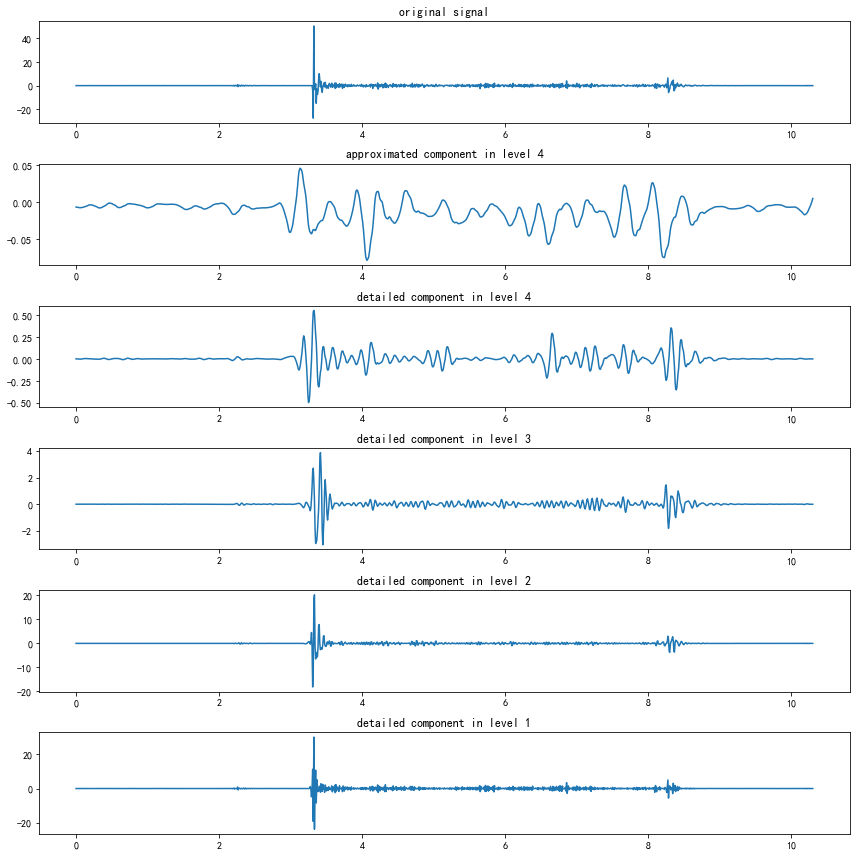

In [8]:
#奇异值分解

import matplotlib.pyplot as plt
import pywt
import pandas as pd
import numpy as np


plt.rcParams['font.family']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.sans-serif'] = ['SimHei']#正常显示标签

path1 = r"D:\HongliCup\题目B\高成本传感器数据\High quality sensor 07.csv"
df = pd.read_csv(path1)
index = df['Time (s)']
data = df['Acceleration x (m/s^2)']

# Create wavelet object and define parameters
w = pywt.Wavelet('db4')  # 选用Daubechies8小波
maxlev = pywt.dwt_max_level(len(data), w.dec_len)
print("maximum level is " + str(maxlev))
threshold = 0.08  # Threshold for filtering

# Decompose into wavelet components, to the level selected:
coeffs = pywt.wavedec(data, 'db4', level=4)  # 将信号进行小波分解
print(coeffs)
x1 = np.multiply(coeffs, [1, 0, 0, 0, 0]).tolist()
x2 = np.multiply(coeffs, [0, 1, 0, 0, 0]).tolist()
x3 = np.multiply(coeffs, [0, 0, 1, 0, 0]).tolist()
x4 = np.multiply(coeffs, [0, 0, 0, 1, 0]).tolist()
x5 = np.multiply(coeffs, [0, 0, 0, 0, 1]).tolist()

ya4 = pywt.waverec(np.multiply(coeffs, [1, 0, 0, 0, 0]).tolist(), 'db4')
yd4 = pywt.waverec(np.multiply(coeffs, [0, 1, 0, 0, 0]).tolist(), 'db4')
yd3 = pywt.waverec(np.multiply(coeffs, [0, 0, 1, 0, 0]).tolist(), 'db4')
yd2 = pywt.waverec(np.multiply(coeffs, [0, 0, 0, 1, 0]).tolist(), 'db4')
yd1 = pywt.waverec(np.multiply(coeffs, [0, 0, 0, 0, 1]).tolist(), 'db4')
n = len(df['Time (s)'])
ya4 = ya4[0:n]
yd4 = yd4[0:n]
yd3 = yd3[0:n]
yd2 = yd2[0:n]
yd1 = yd1[0:n]
x = df['Time (s)']
y = df['Acceleration x (m/s^2)']
print(y)
plt.figure(figsize=(12, 12))
plt.subplot(611)
plt.plot(x, data)
plt.title('original signal')
plt.subplot(612)
plt.plot(x, ya4)
plt.title('approximated component in level 4')
plt.subplot(613)
plt.plot(x, yd4)
plt.title('detailed component in level 4')
plt.subplot(614)
plt.plot(x, yd3)
plt.title('detailed component in level 3')
plt.subplot(615)
plt.plot(x, yd2)
plt.title('detailed component in level 2')
plt.subplot(616)
plt.plot(x, yd1)
plt.title('detailed component in level 1')
plt.tight_layout()
plt.show()

In [1]:
# 小波
import pylab as plt
import pandas as pd
from scipy import signal

plt.rcParams['font.family']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.sans-serif'] = ['SimHei']#正常显示标签

path1 = r"D:\HongliCup\题目B\高成本传感器数据\High quality sensor 01.csv"
df = pd.read_csv(path1)
t = df['Time (s)']
data = df['Acceleration x (m/s^2)']


sampling_rate = len(data)

wavename = 'cgau8'
totalscal = 256
fc = pywt.central_frequency(wavename)
cparam = 2 * fc * totalscal
scales = cparam / np.arange(totalscal, 1, -1)
[cwtmatr, frequencies] = pywt.cwt(data, scales, wavename, 1.0 / sampling_rate)
# print(cwtmatr)
plt.figure(figsize=(8, 4))
plt.subplot(211)
plt.plot(t, data)
plt.xlabel("t(s)")
plt.title('时频谱',  fontsize=20)
plt.subplot(212)
plt.contourf(t, frequencies, abs(cwtmatr))
plt.ylabel(u"prinv(Hz)")
plt.xlabel(u"t(s)")
plt.subplots_adjust(hspace=0.4)
plt.show()

u, sigma, vt = np.linalg.svd(cwtmatr)
print(sigma)
cs = np.cumsum(sigma**2)  
rate = cs / cs[-1]  #计算信息累积贡献率

ind = np.where(rate>=0.9)[0][0]+1
print(ind)

#ind为奇异值的个数，满足信息提出率达到90%
b = np.diag(sigma[:ind]) @ u.T[:ind, :] @ cwtmatr  #得到降维数据

c = np.linalg.norm(b, axis=0, keepdims=True)  #逐列求范数
d = 0.5 * b.T @ b / (c.T @ c) + 0.5  #求相似度
#d = 0.5 * np.corrcoef(b.T) + 0.5
dd = pd.DataFrame(d)
print(dd)

NameError: name 'pywt' is not defined

In [ ]:
# -*- coding: utf-8 -*-

from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.sans-serif'] = ['SimHei']#正常显示标签

path1 = r"D:\HongliCup\题目B\高成本传感器数据\High quality sensor 01.csv"
df = pd.read_csv(path1)
t = df['Time (s)']
s = df['Acceleration x (m/s^2)']


fs = 1/(t[1]-t[0])


#这里使用的是两个简单信号叠加，且频率不随时间变换，这么做是为了便于观察频谱图

#生成1-100Hz的频率，一共100个点(分辨率1Hz)
freq = np.linspace(1, fs/2, 100)


w = 30
#计算不同频率下的小波尺度，对于morlet2小波，他的尺度计算公式a=w*fs/(2*f*np.pi)，其中
#f为时域频率，fs为采样率，参考[4]
a = w*fs / (2*freq*np.pi)

#signal.cwt()函数对信号做连续小波分析，原型参考[3]
#signal.morlet2是一个小波函数，原型参考[4]
#a、w是小波函数signal.morlet2需要的参数，这个函数会按照a、w生成一系列不同尺度的小波
#signal.cwt()函数返回值cwtm就是小波系数矩阵
#前面说过，系数矩阵中，每一列是相同尺度下、不同位置的小波系数，每一行是不同尺度下的小波系数
#第一行对应最高频率（这里是100Hz）小波系数，矩阵最后一行为最低频率(这里是1Hz)的小波系数
cwtm = signal.cwt(s, signal.morlet2, a, w=w)
print(np.shape(cwtm))
u, sigma, vt = np.linalg.svd(cwtm)

cs = np.cumsum(sigma**2)  
rate = cs / cs[-1]  #计算信息累积贡献率
print(rate)

#画出小波系数矩阵坐标图，横轴为时间，纵轴为频率
#np.abs(cwtm)表示求cwtm的模（他是复数），然后把不同大小的模值与cmap指定的颜色集一一映射
'''
plot1 = plt.pcolormesh(t.tail(1), freq, np.abs(cwtm), cmap='viridis', shading='gouraud')
# plt.colorbar（）画出颜色对应的模值，便于观察
plt.colorbar(plot1)

plt.ylabel('Frequency [Hz]')
plt.xlabel('t(s)')
plt.text(0,5,'5Hz',color='r')
plt.text(0,60,'60Hz',color='r')

plt.show()
'''

In [53]:
#模块调用
import numpy as np
import math
import pywt

path1 = r"D:\HongliCup\题目B\低成本传感器数据\low-cost sensor A 02.csv"
df = pd.read_csv(path1)
t = df['Time (s)']
s = df['Acceleration x (m/s^2)']

#封装成函数
def sgn(num):
    if (num > 0):
        return 1.0
    elif (num == 0):
        return 0.0
    else:
        return -1.0


def wavelet_noising(new_df):
    data = new_df
    data = data.values.T.tolist()  # 将np.ndarray()转为列表
    w = pywt.Wavelet('sym8')
    # [ca3, cd3, cd2, cd1] = pywt.wavedec(data, w, level=3)  # 分解波
    [ca5, cd5, cd4, cd3, cd2, cd1] = pywt.wavedec(data, w, level=5)  # 分解波

    length1 = len(cd1)
    length0 = len(data)

    Cd1 = np.array(cd1)
    abs_cd1 = np.abs(Cd1)
    median_cd1 = np.median(abs_cd1)

    sigma = (1.0 / 0.6745) * median_cd1
    lamda = sigma * math.sqrt(2.0 * math.log(float(length0), math.e))
    usecoeffs = []
    usecoeffs.append(ca5)  # 向列表末尾添加对象

    #软硬阈值折中的方法
    a = 0.5

    for k in range(length1):
        if (abs(cd1[k]) >= lamda):
            cd1[k] = sgn(cd1[k]) * (abs(cd1[k]) - a * lamda)
        else:
            cd1[k] = 0.0

    length2 = len(cd2)
    for k in range(length2):
        if (abs(cd2[k]) >= lamda):
            cd2[k] = sgn(cd2[k]) * (abs(cd2[k]) - a * lamda)
        else:
            cd2[k] = 0.0

    length3 = len(cd3)
    for k in range(length3):
        if (abs(cd3[k]) >= lamda):
            cd3[k] = sgn(cd3[k]) * (abs(cd3[k]) - a * lamda)
        else:
            cd3[k] = 0.0

    length4 = len(cd4)
    for k in range(length4):
        if (abs(cd4[k]) >= lamda):
            cd4[k] = sgn(cd4[k]) * (abs(cd4[k]) - a * lamda)
        else:
            cd4[k] = 0.0

    length5 = len(cd5)
    for k in range(length5):
        if (abs(cd5[k]) >= lamda):
            cd5[k] = sgn(cd5[k]) * (abs(cd5[k]) - a * lamda)
        else:
            cd5[k] = 0.0

    usecoeffs.append(cd5)
    usecoeffs.append(cd4)
    usecoeffs.append(cd3)
    usecoeffs.append(cd2)
    usecoeffs.append(cd1)
    recoeffs = pywt.waverec(usecoeffs, w)
    return recoeffs


def denoise(x, data):
    data_denoising = wavelet_noising(data)  #调用小波去噪函数
    return (x, data_denoising)

list2 = denoise(t,s)

s2 = list2[1]
y = s
y_hat = s2
num3 = len(y)
y_hat = y_hat[0:num3]
RMSE = np.linalg.norm(y-y_hat, ord=2)/len(y)**0.5
print(RMSE)

0.006744205556777353


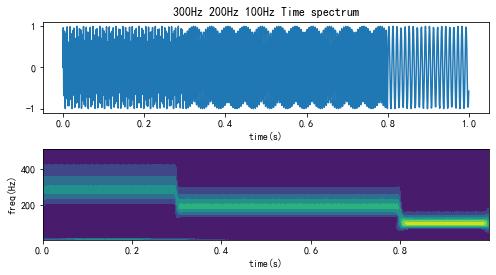

: 

In [100]:
import numpy as np
import pywt
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pylab as plt

sampling_rate = 1024  # 采样频率
t = np.arange(0, 1.0, 1.0/sampling_rate)  # 0-1.0之间的数，步长为1.0/sampling_rate
f1 = 100  # 频率
f2 = 200
f3 = 300
data = np.piecewise(t, [t < 1, t < 0.8, t < 0.3], 
                    [lambda t: np.sin(2 * np.pi * f1 * t), 
                     lambda t: np.sin(2 * np.pi * f2 * t), 
                     lambda t: np.sin(2 * np.pi * f3 * t)]
                    )
wavename = "cgau8"  # 小波函数
totalscal = 256     # totalscal是对信号进行小波变换时所用尺度序列的长度(通常需要预先设定好)
fc = pywt.central_frequency(wavename)  # 计算小波函数的中心频率
cparam = 2 * fc * totalscal  # 常数c
scales = cparam/np.arange(totalscal, 1, -1)  # 为使转换后的频率序列是一等差序列，尺度序列必须取为这一形式（也即小波尺度）
[cwtmatr, frequencies] = pywt.cwt(data, scales, wavename, 1.0/sampling_rate)  # 连续小波变换模块

plt.figure(figsize=(8, 4))
plt.subplot(211)  # 第一整行
plt.plot(t, data)
plt.xlabel(u"time(s)")
plt.title(u"300Hz 200Hz 100Hz Time spectrum")
plt.subplot(212)  # 第二整行

plt.contourf(t, frequencies, abs(cwtmatr))
plt.ylabel(u"freq(Hz)")
plt.xlabel(u"time(s)")
plt.subplots_adjust(hspace=0.4) #调整边距和子图的间距 hspace为子图之间的空间保留的高度，平均轴高度的一部分
plt.show()
